Calculate Kuiper metric for a given cadence for each point of the sky.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

from simcodes.fitters import ExtendedLS
from gatspy.periodic import LombScargleMultiband
from KuiperMetric import KuiperVS

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
# Same for rolling cadence
rollDbFile = '/mnt/Data/Work/Sources/rubin_sim_data/experiments/rolling_all_sky_ns2_rw0.9_v2.0_10yrs.db'
rollName = os.path.split(rollDbFile)[-1].replace('.db', '')
rollDb = maf.db.OpsimDatabase(rollDbFile)
resultsDbRoll = maf.db.ResultsDb(outDir=outDir)
print(rollName)

rolling_all_sky_ns2_rw0.9_v2.0_10yrs


In [6]:
# Set range of periods for which we're gonna build the maps
perStep=100
numPoints=10
periods=np.round(np.linspace(perStep, numPoints*perStep,numPoints,dtype='float'),3)
bundleList=[]
bundleListRoll=[]
nside=2**5 # for HealpixSlicer
for p in periods:
    metric = KuiperVS(period=p)
    sql = ''
    slicer = maf.HealpixSlicer(nside=nside)
    bundleList.append(maf.MetricBundle(metric, slicer, sql, runName='KuiperVSTest_'+str(p)))
    bundleListRoll.append(maf.MetricBundle(metric, slicer, sql, runName='RollKuiperVSTest_'+str(p)))

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [7]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA'].
Found 2086980 visits
Running:  ['KuiperVSTest_100_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_200_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_300_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_400_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_500_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_600_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_700_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_800_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_900_0_KuiperVS_observationStartMJD_HEAL', 'KuiperVSTest_1000_0_KuiperVS_observationStartMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [8]:
bdRoll = maf.metricBundles.makeBundlesDictFromList(bundleListRoll)
bgRoll = maf.metricBundles.MetricBundleGroup(bdRoll, rollDb, outDir=outDir, resultsDb=resultsDbRoll)
bgRoll.runAll()

Querying database observations with no constraint for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA'].
Found 2088105 visits
Running:  ['RollKuiperVSTest_100_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_200_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_300_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_400_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_500_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_600_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_700_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_800_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_900_0_KuiperVS_observationStartMJD_HEAL', 'RollKuiperVSTest_1000_0_KuiperVS_observationStartMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


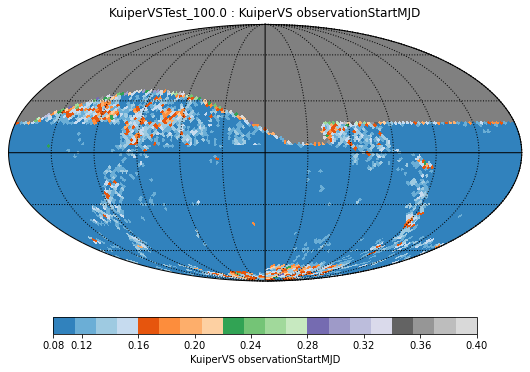

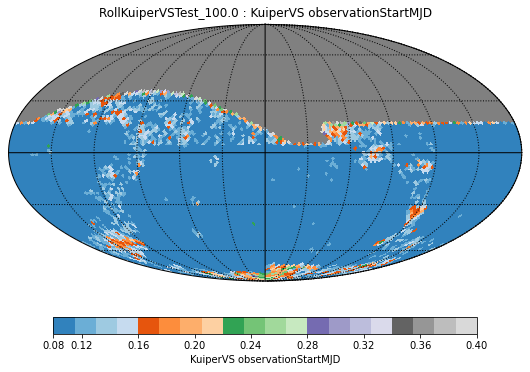

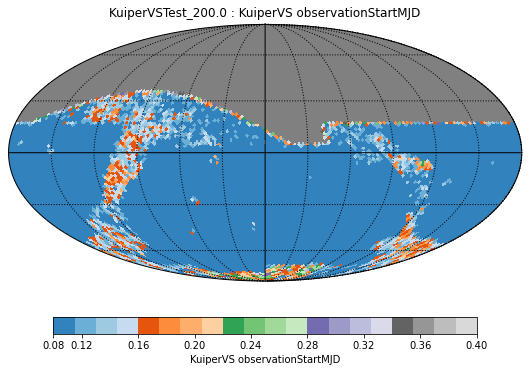

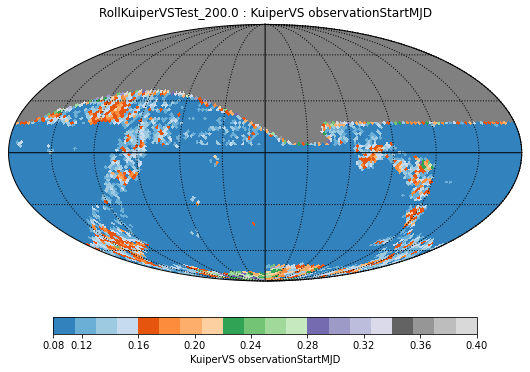

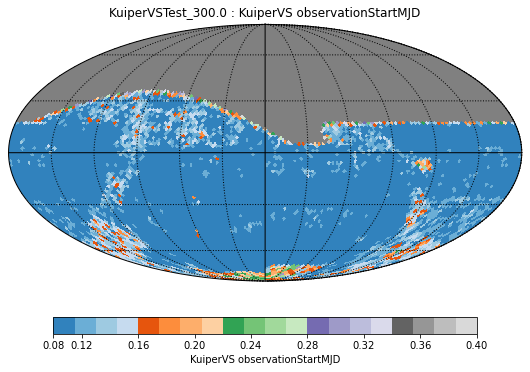

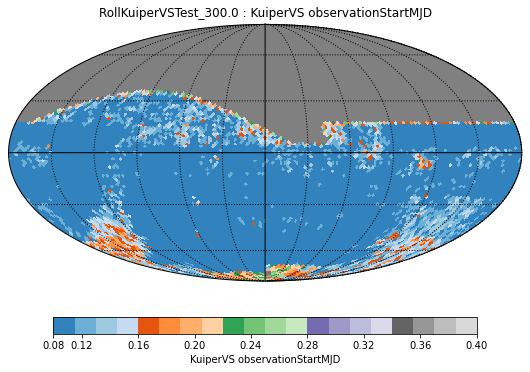

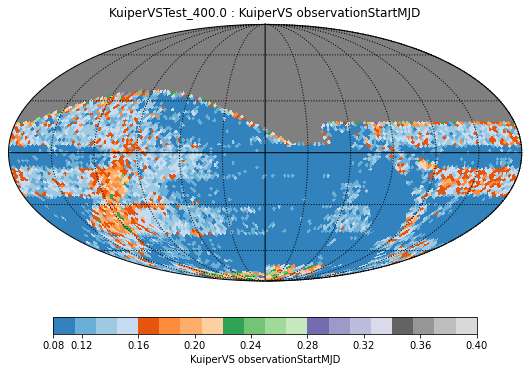

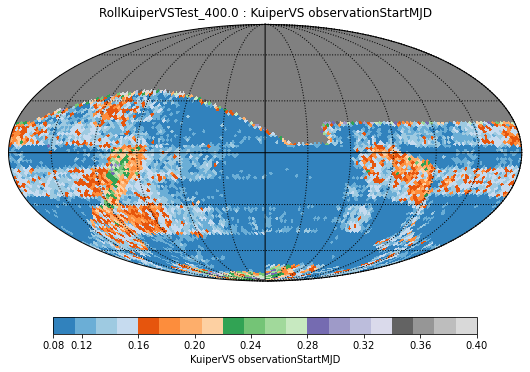

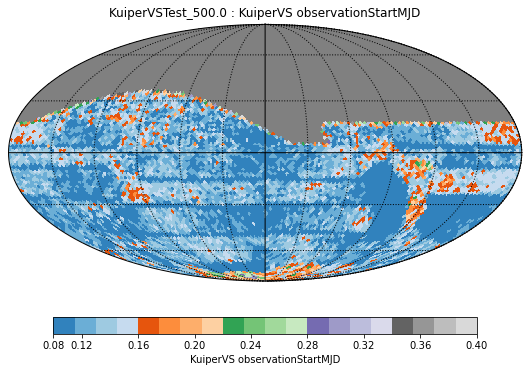

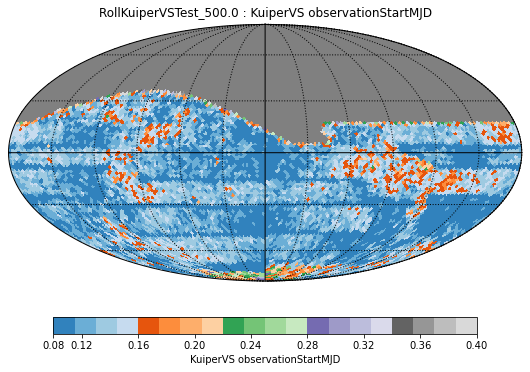

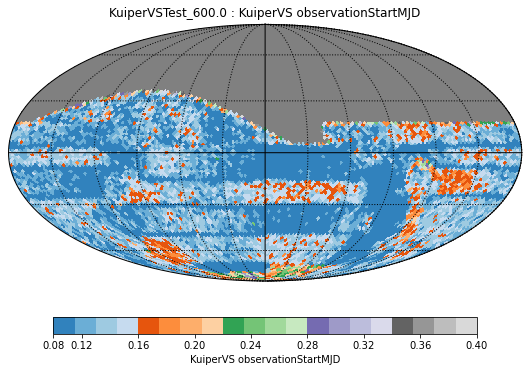

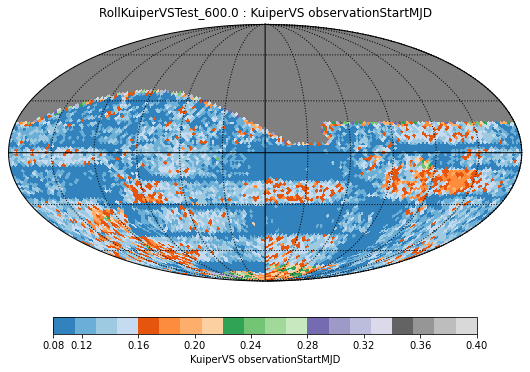

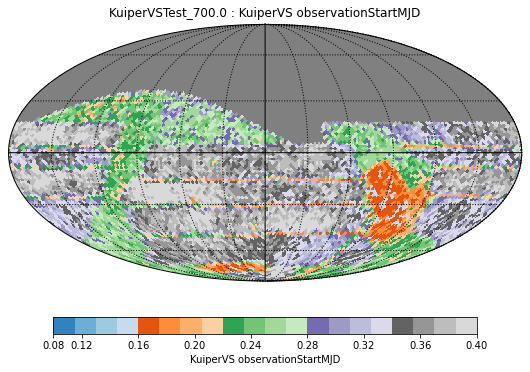

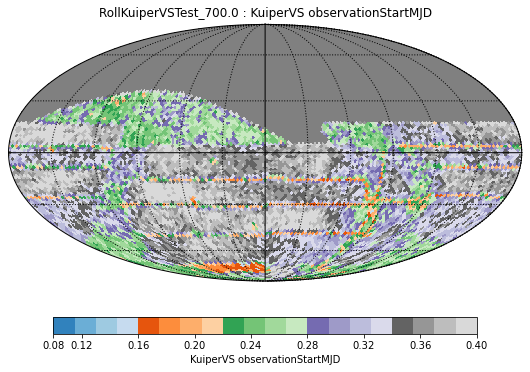

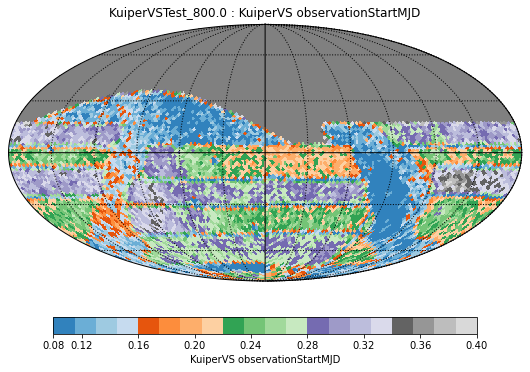

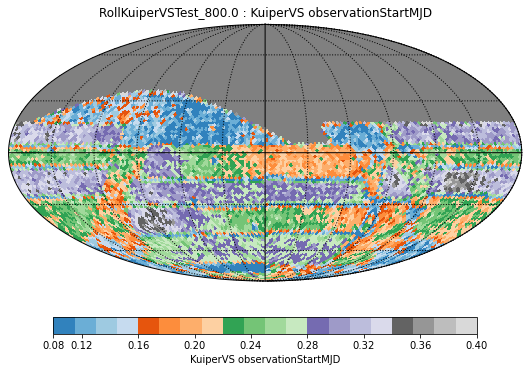

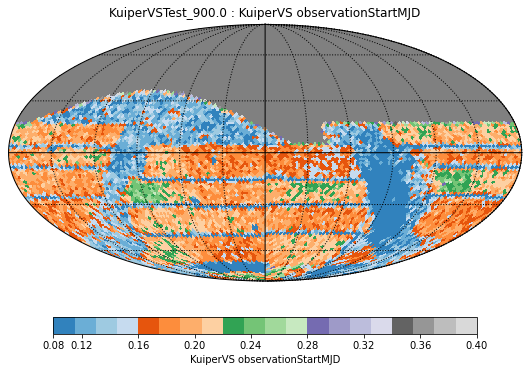

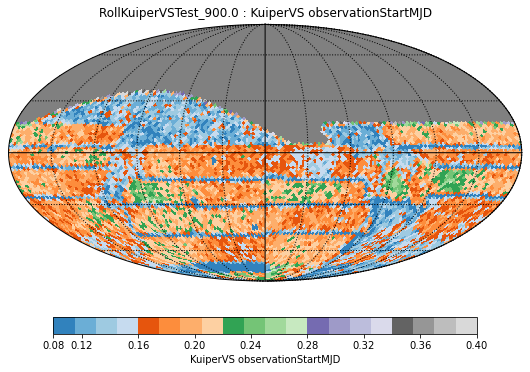

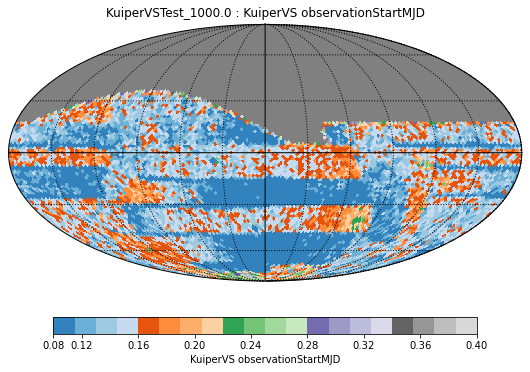

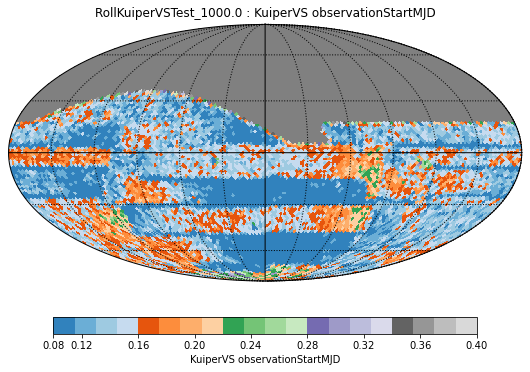

In [9]:
plotDict={"colorMin": 0.1,"colorMax": 0.4,"cmap": plt.get_cmap("tab20c"),"figsize": (8, 5)}
# Let's plot Kuiper metric maps for the base and rolling cadence. To do: make this plot multi-column to be able
# to visually compare different cadences
for m in bg.bundleDict:
    metr=bg.bundleDict[m]
    metr.setPlotDict(plotDict)
    metr.setPlotFuncs([maf.HealpixSkyMap()])
    metr.plot()
    
    metr=bgRoll.bundleDict['Roll'+m]
    metr.setPlotDict(plotDict)
    metr.setPlotFuncs([maf.HealpixSkyMap()])
    metr.plot()

In [10]:
def phasedCadence(period:float,dataSlice,mjdCol:str='observationStartMJD'):
    """
    Returns phase values for the timestamps of observatons
    """
    return (dataSlice[mjdCol]%float(period)/float(period))

In [11]:
def getHpidByCondition(values:np.ndarray,hpids:np.ndarray,
                      valMin:float=0.001, valMax:float=0.99, 
                      randSampleSize:int=None)->pd.DataFrame:
    df=pd.DataFrame(columns=['hpid','kuipValue'])
    selectArr=np.full_like(values,False,dtype=bool)
    selectArr[np.where((values >= valMin) & (values<=valMax))]=True
    df['hpid']=hpids[selectArr]
    df['kuipValue']=values[np.where((values >= valMin) & (values<=valMax))]
    if randSampleSize!=None:
        df=df.sample(randSampleSize)
    return df

In [12]:
workBundle=bundleList[-3]
values=workBundle.metricValues.data
hpids=workBundle.slicer.slicePoints['sid']
period=workBundle.runName.split('_')[1]

kuipHpidLists={'kuipHigh':getHpidByCondition(values,hpids,valMin=0.4, valMax=0.8),
              'kuipLow':getHpidByCondition(values,hpids,valMin=0.08, valMax=0.12),
              'kuipRand':getHpidByCondition(values,hpids,randSampleSize=100)}

In [13]:
print('Low Kuip len',len(kuipHpidLists['kuipLow']))
print('High Kuip len',len(kuipHpidLists['kuipHigh']))
print('Rand Kuip len',len(kuipHpidLists['kuipRand']))

Low Kuip len 1128
High Kuip len 8
Rand Kuip len 100


In [14]:
"""
For some weird reason just passing a hpidList results in a lesser number of hpid-associated dataSlices 
than the length of the hpidList (too many hpids return masked, as if there are no observations - which is 
not true). Because of this this cell is temporarily commented, and instead of it the code in 
the next cell is used.
"""
"""
metricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
sql = ''
bundleListKuip=[]
for key,val in kuipHpidLists.items():
    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=val['hpid'])
    bundleListKuip.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=key))

bdKuip = maf.metricBundles.makeBundlesDictFromList(bundleListKuip)
bgKuip = maf.metricBundles.MetricBundleGroup(bdKuip, conn, 
                                                outDir=outDir, resultsDb=resultsDb)
bgKuip.runAll()
"""

"\nmetricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])\nsql = ''\nbundleListKuip=[]\nfor key,val in kuipHpidLists.items():\n    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=val['hpid'])\n    bundleListKuip.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=key))\n\nbdKuip = maf.metricBundles.makeBundlesDictFromList(bundleListKuip)\nbgKuip = maf.metricBundles.MetricBundleGroup(bdKuip, conn, \n                                                outDir=outDir, resultsDb=resultsDb)\nbgKuip.runAll()\n"

In [15]:
# Here we obtain observational data for each hpix separately. To do: fix the previous cell, because 
# doing it for each healPix in a cycle is computationally terrible

metricPass = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
sql = ''
bundleListKuipByHPix=[]
for hpid in kuipHpidLists['kuipHigh']['hpid']:
    slicerKuip=maf.HealpixSubsetSlicer(nside=nside,hpid=[hpid])
    bundleListKuipByHPix.append(maf.MetricBundle(metricPass, slicerKuip, sql, runName=str(hpid)))

bdKuipByHPix = maf.metricBundles.makeBundlesDictFromList(bundleListKuipByHPix)
bgKuipByHPix = maf.metricBundles.MetricBundleGroup(bdKuipByHPix, conn, 
                                                outDir=outDir, resultsDb=resultsDb)
bgKuipByHPix.runAll()

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Querying database observations with no constraint for columns ['fieldDec', 'fiveSigmaDepth', 'fieldRA', 'filter', 'rotSkyPos', 'observationStartMJD'].
Found 2086980 visits
Running:  ['3185_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running:  ['3277_Pass_filter_observationStartMJD_fiveSigmaDepth_HEAL']
Completed metric generation.
Running:  ['4349_Pas

/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alex/anaconda3/envs/rubin/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, cas

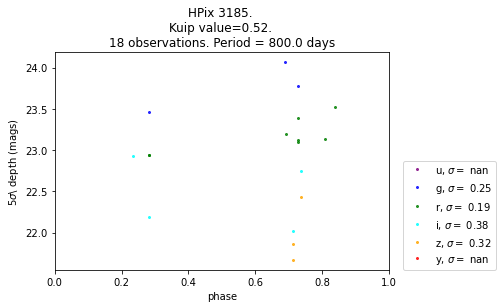

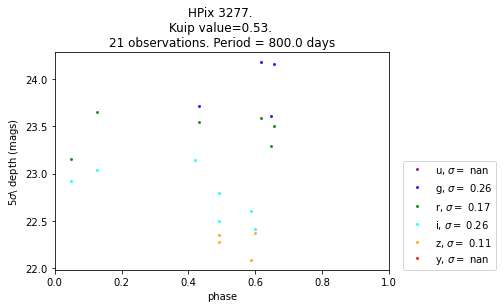

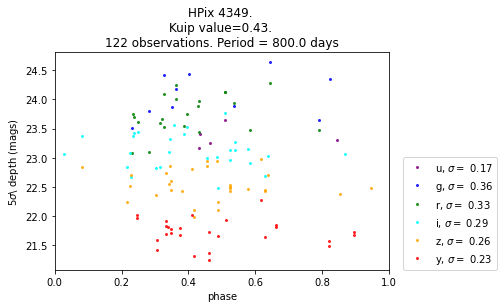

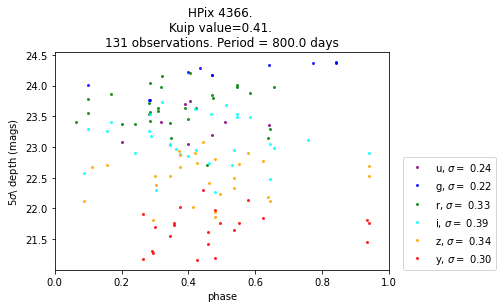

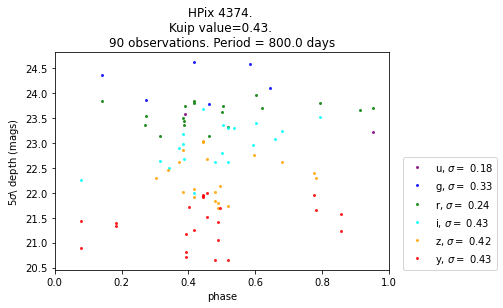

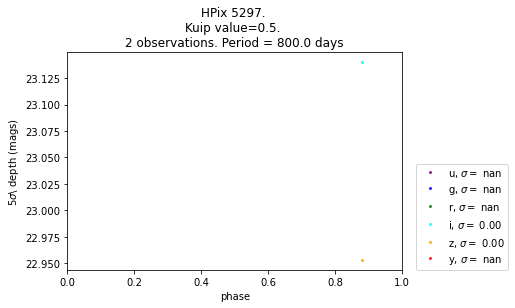

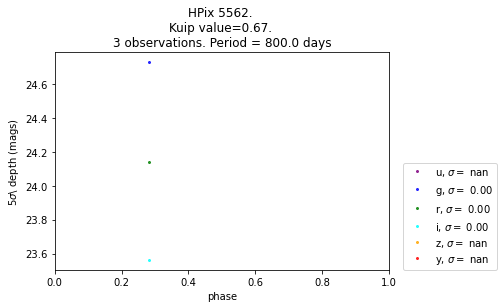

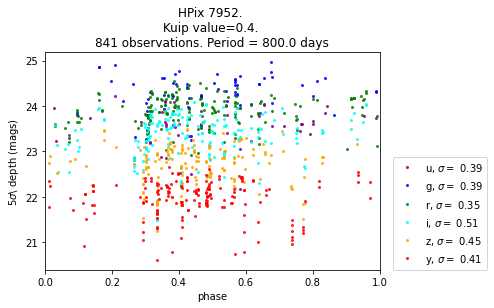

In [16]:
# Plot observations for every healpix

for i in range(len(bundleListKuipByHPix)):
    dataSlice=bundleListKuipByHPix[i].metricValues.data[~bundleListKuipByHPix[i].metricValues.mask][0]
    new_dt = np.dtype(dataSlice.dtype.descr + [('phasedObs', '<f8')])
    dataSlice2 = np.zeros(dataSlice.shape, dtype=new_dt)
    for c in dataSlice.dtype.names:
        dataSlice2[c]=dataSlice[c]
    dataSlice2['phasedObs']=phasedCadence(period=period,dataSlice=dataSlice)
    # Let's plot up what the 5-sigma depth looks like
    plt.figure()
    # Give each filter it's own color
    f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}
    for fn in f2c:
        in_filt = np.where(dataSlice2['filter'] == fn)[0]
        plt.plot(dataSlice2['phasedObs'][in_filt],
                 dataSlice2['fiveSigmaDepth'][in_filt], 'o',
                 color=f2c[fn],
                 label=fn+r', $\sigma=$ %.2f' % (np.std(dataSlice2['fiveSigmaDepth'][in_filt])),
                 alpha=0.8,
                 markersize=2)
    plt.xlabel('phase')
    plt.ylabel(r'5$\sigma$\ depth (mags)')
    plt.xlim(0,1)
    plt.legend(loc=(1.04,0))
    kuipVal=round(kuipHpidLists['kuipHigh'][kuipHpidLists['kuipHigh']['hpid']==int(bundleListKuipByHPix[i].runName)]['kuipValue'].iloc[0],2)
    plt.title('HPix '+bundleListKuipByHPix[i].runName+'. \n'+
              'Kuip value='+str(kuipVal)+'. \n'+
              str(len(dataSlice))+' observations. Period = '+period+' days')

In [17]:
### Integrating with period determination
library=pd.read_csv('/mnt/Data/Work/GitHub/KuiperTest_VStemplates/simcodes/ZTF_VS_all_formatted.csv',index_col=0)
library['unique_filts_']=library['unique_filts_'].apply(lambda x:list(map(eval,x[1:-1].split(' '))))
library['ymean_by_filt_']=library['ymean_by_filt_'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))
library['theta']=library['theta'].apply(lambda x:np.array([float(k) for k in x[1:-1].split(' ') if len(k)>0]))

In [39]:
def determinePeriod(dataSlice,row,periodMin:float, periodMax:float,plot:bool)->float:
    uniqueFilts=[s.strip('z') for s in row['unique_filts_']]
    dataSlice=dataSlice[np.isin(dataSlice['filter'], uniqueFilts)]
    t=dataSlice['observationStartMJD']
    filts=dataSlice['filter']
    ext=ExtendedLS(fit_period=True,optimizer_kwds=dict(quiet=True),Nterms_base=row['Nterms'])
    ext.import_parameters(row)
    mags = ext.predict(t=t,filts=filts)
    magErrs=0.1*mags
    ext.optimizer.period_range = (periodMin, periodMax)
    p=ext.fit(t,mags,magErrs,filts).best_period
    if plot==True:
        fig=plt.figure(figsize=(3,2))
        subplot=fig.add_subplot(1,1,1)
        for f in uniqueFilts:
            subplot.scatter((t[np.where(filts==f)]%p)/p,mags[np.where(filts==f)],s=1,label=f)
        subplot.legend()
    return p

In [48]:
def getLCsFromHPix(bundleListByHPix:list,idx:int,
                   library:pd.DataFrame,periodMin=0.1,periodMax=10,
                   plot:bool=True):
    dataSlice=bundleListByHPix[idx].metricValues.data[~bundleListByHPix[idx].metricValues.mask][0]
    print('dataSlice size is '+str(len(dataSlice)))
    libraryObsQuality=library.copy(deep=True)
    libraryObsQuality['detectedPeriod']=None
    fig=plt.figure(figsize=(5,5))


    libraryObsQuality['detectedPeriod']=libraryObsQuality.progress_apply(lambda row:determinePeriod(dataSlice,row,
                                                                                           periodMin, periodMax,
                                                                                           plot=plot), 
                                                                                           axis=1)
    libraryObsQuality['diffPeriod']=libraryObsQuality['_best_period']-libraryObsQuality['detectedPeriod']
    
    libraryObsQuality['relativeError']=libraryObsQuality['diffPeriod']*100/libraryObsQuality['_best_period']
    return libraryObsQuality

In [20]:
kuipHpidLists['kuipHigh']

,hpid,kuipValue
0,3185,0.517846
1,3277,0.528313
2,4349,0.433172
3,4366,0.406061
4,4374,0.429215
5,5297,0.499917
6,5562,0.666582
7,7952,0.401380


In [21]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [22]:
idxs={l.runName:i for i,l in enumerate(bundleListKuipByHPix)}

In [23]:
idxs['4374']

4

In [30]:
library[library['_best_period']>805].sort_values(by='_best_period')

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms
56817,805.881653,[zg],[13.10071598],0.007797,"[-0.0017049102, -0.340004329, -0.0134280308, 0...",1629153663140844672,183.606628,-622.275025,MIRA_SR,Mira or Semiregular,3
74465,806.152202,"[zg, zr]","[15.31665107, 13.11966163]",0.007794,"[0.15977395, 0.64020307, -0.39503584, -0.13587...",4092798138887516928,146.498976,-659.653226,MIRA_SR,Mira or Semiregular,5
29316,806.267989,"[zg, zr]","[15.70225102, 13.56573998]",0.007793,"[-0.12341497, 0.27270185, -0.12869284, 0.08092...",1977744685038341760,159.373136,-646.894853,MIRA_SR,Mira or Semiregular,1
95427,806.795295,"[zg, zr]","[19.36136855, 16.50314035]",0.007788,"[-0.05508801, 0.29893624, -0.25250494, 0.08910...",4160888694926208128,158.668595,-648.126700,MIRA_SR,Mira or Semiregular,5
40004,807.697472,"[zg, zr]","[16.33262095, 13.74750815]",0.007779,"[-0.17683672, -0.14232426, -0.00168032, 0.1536...",4091752670740014848,155.725586,-651.971886,MIRA_SR,Mira or Semiregular,3
...,...,...,...,...,...,...,...,...,...,...,...
14012,1242.523697,"[zg, zr]","[15.93435786, 12.76576338]",0.005057,"[0.01990871, -0.10756639, 0.13909305, 0.005435...",257847674422379776,200.053396,-1042.470301,MIRA_SR,Mira or Semiregular,1
57438,1251.054850,"[zg, zr]","[15.27591328, 13.49489616]",0.005022,"[-0.04422675, 0.19193597, 0.09458037, -0.00965...",4523362219311214336,201.272995,-1049.781855,MIRA_SR,Mira or Semiregular,3
24018,1251.054850,"[zg, zr]","[15.27591328, 13.49489616]",0.005022,"[-0.06406547, 0.20270285, 0.07086977, 0.025437...",4523362219311214336,201.272995,-1049.781855,MIRA_SR,Mira or Semiregular,1
90858,1251.054850,"[zg, zr]","[15.27591328, 13.49489616]",0.005022,"[-0.04120652, 0.210567, 0.09007424, 0.00255408...",4523362219311214336,201.272995,-1049.781855,MIRA_SR,Mira or Semiregular,5


dataSlice size is 90


  0%|          | 0/3 [00:00<?, ?it/s]

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms,detectedPeriod,diffPeriod,relativeError
4699,791.016674,"[zg, zr]","[18.26380252, 16.6246588]",0.007943,"[0.00542707, 0.10531082, -0.19179697, 0.007597...",3336333520408537216,167.198935,-623.817739,MIRA_SR,Mira or Semiregular,1,790.859190,0.157484,0.019909
92392,800.541226,"[zg, zr]","[18.54649022, 15.16391947]",0.007849,"[0.21596034, -0.11322312, 0.31646474, -0.04466...",2071653285970616064,153.537039,-647.004188,MIRA_SR,Mira or Semiregular,5,800.446318,0.094909,0.011856
29316,806.267989,"[zg, zr]","[15.70225102, 13.56573998]",0.007793,"[-0.12341497, 0.27270185, -0.12869284, 0.08092...",1977744685038341760,159.373136,-646.894853,MIRA_SR,Mira or Semiregular,1,806.083829,0.184160,0.022841


<Figure size 360x360 with 0 Axes>

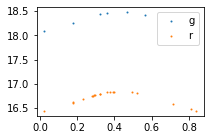

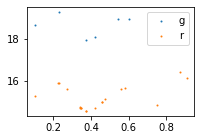

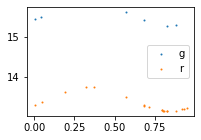

In [49]:
lib=library.iloc[[4699,92392,29316]]
getLCsFromHPix(bundleListKuipByHPix,idx=4,library=lib,periodMin=500, periodMax=1000)

In [46]:
lib

,_best_period,unique_filts_,ymean_by_filt_,omega,theta,source_id,Expected,E-C,Type,Subtype,Nterms
4699,791.016674,"[zg, zr]","[18.26380252, 16.6246588]",0.007943,"[0.00542707, 0.10531082, -0.19179697, 0.007597...",3336333520408537216,167.198935,-623.817739,MIRA_SR,Mira or Semiregular,1
92392,800.541226,"[zg, zr]","[18.54649022, 15.16391947]",0.007849,"[0.21596034, -0.11322312, 0.31646474, -0.04466...",2071653285970616064,153.537039,-647.004188,MIRA_SR,Mira or Semiregular,5
29316,806.267989,"[zg, zr]","[15.70225102, 13.56573998]",0.007793,"[-0.12341497, 0.27270185, -0.12869284, 0.08092...",1977744685038341760,159.373136,-646.894853,MIRA_SR,Mira or Semiregular,1
